In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import gym
import QDgym

In [6]:
env = gym.make("QDHalfCheetahBulletEnv-v0")
# reset environment
state = env.reset()
done = False
# eval loop
a = []
while not done: 
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) 
    a.append(env.desc)
# get fitness and BD
fitness = env.tot_reward
behaviour_descriptor = env.desc # alternatively behaviour_descriptor = info["bc"] for compatability with the code released for MAP-Elites-ES
# close environment
env.close()

The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['ffoot', 'bfoot']


In [5]:
behaviour_descriptor

array([0.236, 0.643])

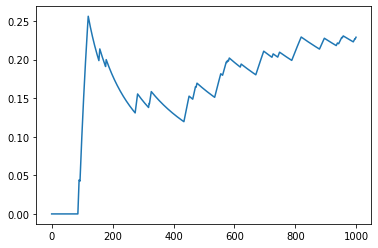

In [8]:
plt.plot([x[0] for x in a])

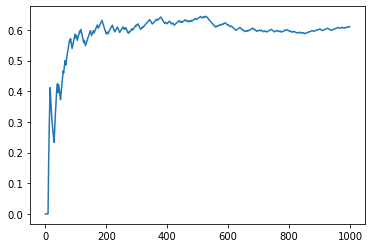

In [9]:
plt.plot([x[1] for x in a])

In [ ]:
# I am trying to write down the Evolvability Map elites algorithm
# Let us do it in steps:
#   1. let me write down the basic code for normal map elites
#   2. Let me write down ES map elites
#   3. Let me write down Evolvability map elites
#   4. Let me write down variants of the algorithm

In [ ]:
def fitness_func(x):
    fitness = x[0]*x[1]
    bc = np.array([x[0],x[1]])
    return fitness,bc

In [ ]:

# uniform grid
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}

def behaviour_to_cell_coords(bc,map_elites_grid_description):
    cell_coords = None # calculate which cell the behaviour is in
    return cell_coords
    
def create_map_elites_grid(map_elites_grid_description):
    return [[]] #array with the poroper size
    
    
# A cell holds all kind of info
# Most important is current elite: 
example_cell = {
    "fitness_elite_fitness"
    "fitness_elite_params"
    "innovation_elite"
    "evolvability_elite"
    "stats" # how many times upgraded, fitness history ...
}
        
bc_archive
    
    
    

In [ ]:
def update_grid(grid,fitness,bc,new_individual):
    cell_coords = behaviour_to_cell_coords(bc)
    cell_elite_fitness = grid[cell_coords]["fitness_elite_fitness"]
    
    if cell_elite_fitness <= fitness:
        # replace old elite with new individual
        grid[cell_coords]["fitness_elite_fitness"] = fitness
        grid[cell_coords]["fitness_elite_params"] = mutated_copy

In [ ]:
# First normal map elites

# grid is an n-d array, where each element is a dict, containing cell data
grid = create_map_elites_grid(map_elites_grid_description)
# bc archive is a list of (tuple?), conatining bc of all the seen individuals (and maybe  some extra data...) 
bc_archive = []



while True:
    
    parent_cell = select_parent_cell(grid)  # will return none if no cell available yet
    parent = select_parent_elite(parent_cell)  # will be randomly init if parent_cell is none
    
    # choose ES update
    operator = select_operator()
    
    # update / mutate individual
    updated_individual_1,evo_0,innov_0 = es_update(parent)
    updated_individual_2,evo_1,innov_1 = es_update(updated_individual_1) # TODO cache updated_individual_2, if we ever want to update updated_individual_1 in the future
    # Also we can use updated_individual_2 now to update fitness if we want to
    
    # evaluate
    fitness_1,bc_1 = evaluate(updated_individual_1)
    
    # update grid
    grid = update_grid(grid,fitness_1,bc_1,updated_individual_1,evo_1,innov_1)
    bc_archive = update_archive(bc_archive,bc_1,updated_individual_1)
    
    
    
    
    
    

    
    
    
    
    





In [ ]:
# Grid type
# - single
# - multi, independent
# - multi, nd_sort
# - multi, coop



In [ ]:
# Build simple working prototype

In [12]:
def create_map_elites_grid(map_elites_grid_description):
    grid = np.empty(shape = map_elites_grid_description["grid_dims"], dtype=object)
    return grid

def get_non_empty_cells(grid,map_elites_grid_description):
    grid != None

In [ ]:
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}

grid = create_map_elites_grid(map_elites_grid_description)

for gen_i in range(3):
    
    parent_cell = select_parent_cell(grid)  # will return none if no cell available yet
    parent = select_parent_elite(parent_cell)  # will be randomly init if parent_cell is none
    
    

In [17]:
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}
grid = create_map_elites_grid(map_elites_grid_description)
len(grid)
len(grid[2])

20

In [ ]:
def create_map_elites_grid(map_elites_grid_description):
    num_elements = np.prod(map_elites_grid_description["grid_dims"])

In [18]:
num_elements = np.prod(map_elites_grid_description["grid_dims"])
grid = np.array()

In [23]:
grid = np.empty(shape = map_elites_grid_description["grid_dims"], dtype=object)

In [27]:
a = grid[4,7]

In [35]:
grid[4,7] = {4: 5}
grid[7,7] = {4: 7}

In [39]:
non_empty_mask = grid != None
non_empty_coords = np.where(non_empty_mask)
non_empyt_cells = grid[non_empty_mask]

In [43]:
a = object()

In [48]:
non_empty_coords

(array([4, 7]), array([7, 7]))

In [50]:
import random

In [54]:
choosen_coords = random.choice(non_empty_coords)

In [55]:
choosen_cell = [for coord in choosen_coords]  grid[choosen_coords]

array([[None, None, None, None, None, None, None, {4: 5}, None, None,
        None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, {4: 7}, None, None,
        None, None, None, None, None, None, None, None, None, None]],
      dtype=object)

In [56]:
choosen_coords

array([4, 7])

In [58]:
grid[tuple(choosen_coords)]

{4: 5}

In [69]:
config = {
    "map_elites_grid_description" : {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}}

bc = [1,-0.89]


coords = []
for bc_dim,behaviour in enumerate(bc):

    limits = config["map_elites_grid_description"]["bc_limits"][bc_dim]
    num_grids = config["map_elites_grid_description"]["grid_dims"][bc_dim]

    if behaviour <= limits[0]:
        coord = 0
    elif behaviour >= limits[1]:
        coord = num_grids-1
    else:
        step = (limits[1]-limits[0]) / num_grids
        coord = int((behaviour - limits[0]) / step)
        
    coords.append(coord)
coords

[19, 1]

In [89]:
a = torch.randn(10,2)
mean_a = torch.mean(a,dim=0)
torch.sum((a-mean_a)**2) / 10


tensor(3.1110)

In [80]:
a - mean_a

tensor([[ 8.4407e-01,  1.1173e-01],
        [-5.5950e-01, -1.0724e+00],
        [ 1.1421e+00,  1.3408e+00],
        [-5.2538e-01, -1.6021e-03],
        [-1.3224e+00,  2.4174e-01],
        [ 9.6061e-01, -7.2827e-02],
        [-5.7323e-01,  9.5675e-01],
        [ 1.1200e-02,  5.0863e-01],
        [ 2.6036e-01, -3.1742e-01],
        [-2.3784e-01, -1.6954e+00]])

In [79]:
a

tensor([[ 1.1608,  0.2259],
        [-0.2428, -0.9582],
        [ 1.4588,  1.4549],
        [-0.2087,  0.1125],
        [-1.0057,  0.3559],
        [ 1.2773,  0.0413],
        [-0.2565,  1.0709],
        [ 0.3279,  0.6228],
        [ 0.5771, -0.2033],
        [ 0.0789, -1.5813]])

In [81]:
mean_a

tensor([0.3167, 0.1141])

In [91]:
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans

In [ ]:
kdt = KDTree(c, leaf_size=30, metric='euclidean') # main k-nn

In [92]:
KMeans

sklearn.cluster._kmeans.KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from es_map import behavior_map
from es_map import novelty_archive

In [2]:
# DUMMY map elites loop

config = {
    
    "map_elites_grid_description" : {
        "bc_limits" : [[-1,1],[-1,1]],
        "grid_dims" : [20,20],
        },
}



b_map = behavior_map.Grid_behaviour_map(config)
b_archive = novelty_archive.NoveltyArchive(bc_dim = len(config["map_elites_grid_description"]["grid_dims"]))



def get_random_model_parameters():
    return np.random.randn(2)


def evaluate_model(x):
    fitness = np.prod(x)
    bc = np.sin(x)
    return fitness,bc

 
for gen in range(1000):
    
    params = get_random_model_parameters()
    fitness,bc = evaluate_model(params)
    
    novelty = b_archive.calculate_novelty(bc)
    b_archive.add_to_archive(bc)
    
    coords = b_map.get_cell_coords(bc,config)
    old_elite = b_map.data[coords]
    if old_elite is None or old_elite["eval_fitness"] < fitness:
        #print("New elite at: ",coords)
        b_map.data[coords] = {
            "params" : params,  # 1d torch tensor containing the parameters 
            "eval_fitness" : fitness,
            "eval_bc" : bc,
            
            "eval_novelty" : novelty,
        }
    
        
    
    
    

In [3]:

fitnesses = []
novelties = []
for elite in b_map.data.flatten():
    if elite is not None:
        fitnesses.append(elite["eval_fitness"])
        novelties.append(elite["eval_novelty"])
    else:
        fitnesses.append(None)
        novelties.append(None)


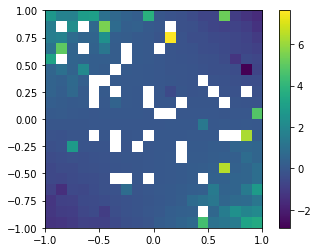

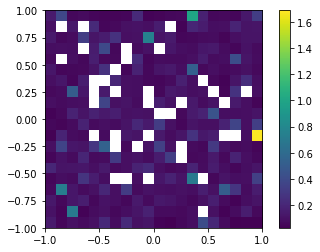

In [4]:
plt.imshow(np.array(fitnesses).astype(np.float).reshape(20,20),extent=[-1,1,-1,1])
plt.colorbar()
plt.show()
plt.imshow(np.array(novelties).astype(np.float).reshape(20,20),extent=[-1,1,-1,1])
plt.colorbar()

In [6]:
len(novelties)

400

In [7]:
len(fitnesses)

400

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [9]:
all_bcs = np.random.randn(10,2)

nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
nn_model.fit(all_bcs)




NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [11]:
distances, a = nn_model.kneighbors(np.random.randn(1,2), n_neighbors=5)

In [12]:
distances

array([[0.29212001, 0.63869402, 0.75529381, 0.88998456, 1.34262215]])

In [17]:
nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
nn_model.fit(np.array([]).reshape(-1,2))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.